# **Neural Networks - A Model That Can Accurately Identify House Numbers In An Image Using Google's Street View House Numbers (SVHN) Dataset.  - By David Salako.**

<br>

## **Background and Context**

The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications. The Street View House Numbers (SVHN) dataset is one of the most popular ones. It has been used in neural networks created by Google to read house numbers and match them to their geolocations. This is a great benchmark dataset to play with, learn and train models that accurately identify street numbers, and incorporate them into all sorts of projects.

<br>

## **Objective**
In this project, we will use a dataset with images centered around a single digit (many of the images do contain some distractors at the sides). Although this is a sample of the data which is simple, it is more complex than MNIST because of the distractors. Given the dataset, the aim is to build a model that can identify house numbers in an image.

<br>

## **Dataset**

The SVHN dataset has the following features:

* Number of classes: 10
* Training data: 42000 images
* Validation data: 60000 images
* Testing data: 18000 images

<br>



In [1]:
# mounting the drive to use the files in the notebook
from google.colab import drive
drive.mount('/content/drive')

# importing the required packages and loading the .h5 type data file using the h5py package  

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import optimizers

import cv2

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd 
import numpy as np 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score, precision_recall_curve, auc
import h5py 
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from IPython.display import display, HTML,Markdown




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read the .h5 file and check the column keys and names.**

In [2]:
# Open the .h5 file as readonly.
# Check for the columns / keys and load the data appropriately.

with h5py.File("/content/drive/My Drive/SVHN_single_grey1.h5",'r') as h5f:
    print(list(h5f.keys()))
    xtrain = np.array(h5f.get('X_train'))
    ytrain = np.array(h5f.get('y_train'))
    xtest  = np.array(h5f.get('X_test'))
    ytest  = np.array(h5f.get('y_test'))
    xval   = np.array(h5f.get('X_val'))
    yval   = np.array(h5f.get('y_val'))

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [3]:
xtest[5],ytest[5]

(array([[102.1979,  99.91  ,  97.2631, ...,  94.3354,  95.1073,  95.1073],
        [ 95.8996,  94.8396,  94.0785, ...,  86.1127,  86.8245,  87.2975],
        [ 87.8295,  88.6553,  91.0079, ...,  76.602 ,  77.9008,  78.3846],
        ...,
        [ 95.4142,  94.724 ,  97.0227, ...,  52.6493,  53.4104,  53.6384],
        [ 95.9411,  95.425 ,  97.0227, ...,  53.791 ,  53.8511,  54.3672],
        [ 97.0119,  96.4357,  96.6098, ...,  54.6446,  55.4057,  55.8186]],
       dtype=float32), 9)

**Let us visualize some of the SVHN dataset.**

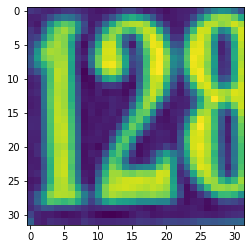

y (training):  2


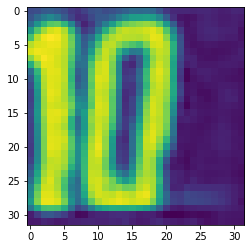

y (validation):  0


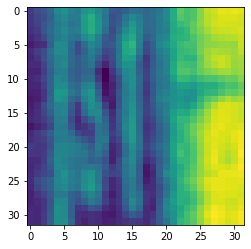

y (testing):  1


In [4]:
plt.imshow(xtrain[0]) #Show first image in the training set. 
plt.show() 
print('y (training): ', ytrain[0]) 
plt.imshow(xval[0]) #Show first image in the validation set. 
plt.show() 
print('y (validation): ', yval[0])
plt.imshow(xtest[0]) #Show first image in the test set. 
plt.show() 
print('y (testing): ', ytest[0])

Label for each of the images below: [2 6 7 4 4 0 3 0 7 3]


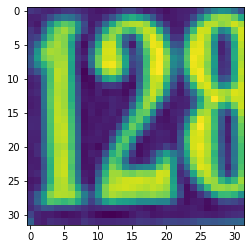

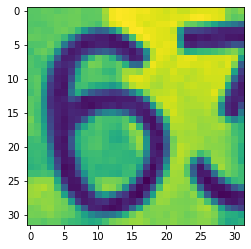

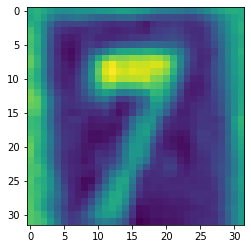

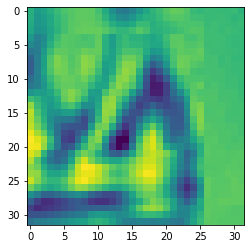

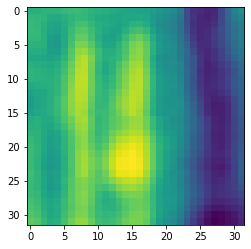

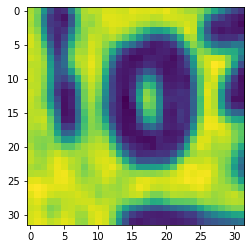

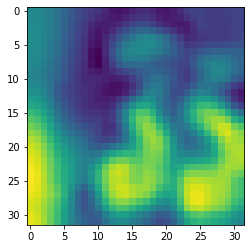

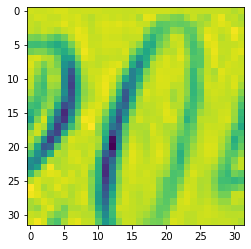

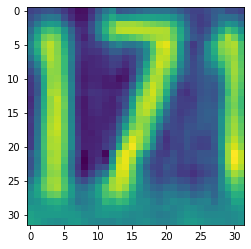

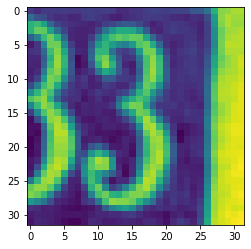

In [5]:
# Visualize some more...
# Plot first 10 images in the training set and their respective labels.
for i in range(10):
    image = xtrain[i]
    plt.figure(i)
    plt.imshow(image)
print('Label for each of the images below: %s' % (ytrain[0:10]))

Label for each of the images below: [0 0 0 0 0 0 0 0 0 0]


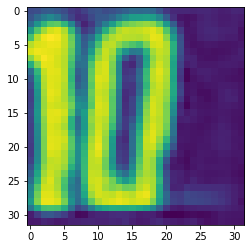

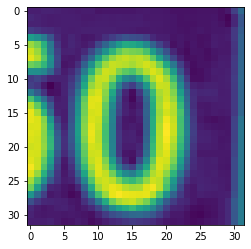

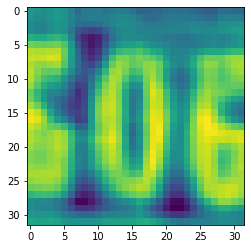

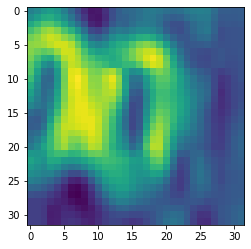

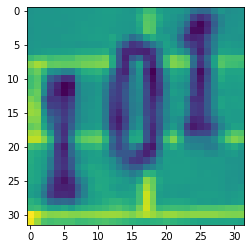

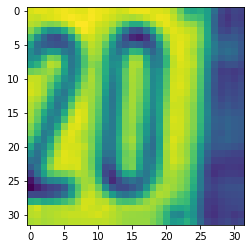

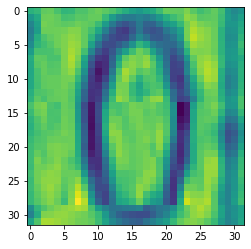

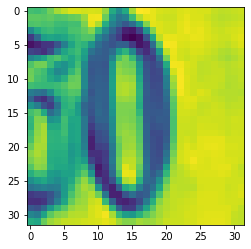

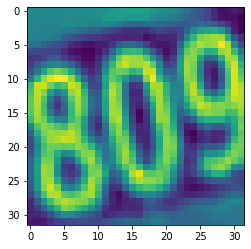

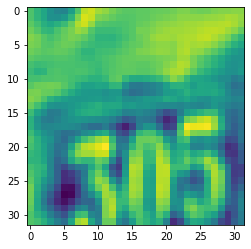

In [6]:
# Visualize some more...
# Plot first 10 images in the validation set and their respective labels.
for i in range(10):
    image = xval[i]
    plt.figure(i)
    plt.imshow(image)
print('Label for each of the images below: %s' % (yval[0:10]))

Label for each of the images below: [1 7 2 9 0 9 1 8 4 4]


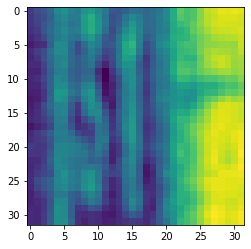

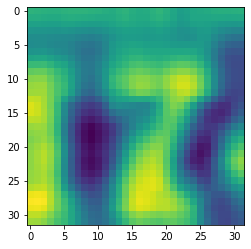

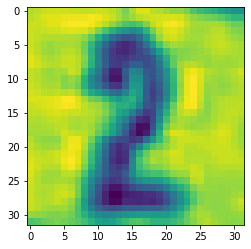

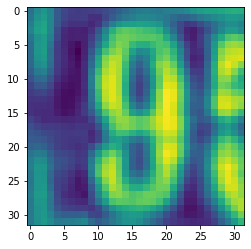

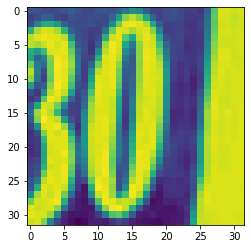

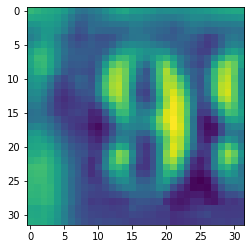

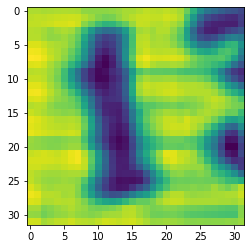

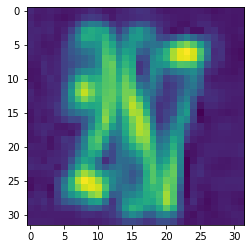

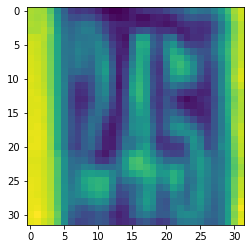

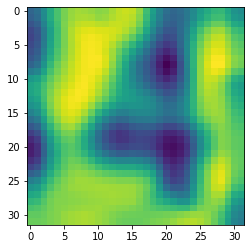

In [7]:
# Visualize some more...
# Plot first 10 images in the test set and their respective labels.
for i in range(10):
    image = xtest[i]
    plt.figure(i)
    plt.imshow(image)
print('Label for each of the images below: %s' % (ytest[0:10]))

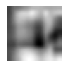

Labels for each of the above respective testing images: [2 6 7 ... 7 0 4]


In [8]:
# Training images displayed in grayscale in 32 x 32 pixel format.
%matplotlib inline
plt.figure(figsize=(15, 1))
for i in range(len(xtrain)):
    plt.imshow(xtrain[i].reshape(32,32), cmap="gray")
    plt.axis('off')
plt.show()
print('Labels for each of the above respective testing images: %s' % (ytrain[0:len(xtrain)]))

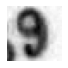

Labels for each of the above respective testing images: [0 0 0 ... 9 9 9]


In [9]:
# Validation images displayed in grayscale in 32 x 32 pixel format.
%matplotlib inline
plt.figure(figsize=(15, 1))
for i in range(len(xval)):
    plt.imshow(xval[i].reshape(32,32), cmap="gray")
    plt.axis('off')
plt.show()
print('Labels for each of the above respective testing images: %s' % (yval[0:len(xval)]))

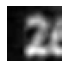

Labels for each of the above respective testing images: [1 7 2 ... 7 9 2]


In [10]:
# Testing images displayed in grayscale in 32 x 32 pixel format.
%matplotlib inline
plt.figure(figsize=(15, 1))
for i in range(len(xtest)):
    plt.imshow(xtest[i].reshape(32,32), cmap="gray")
    plt.axis('off')
plt.show()
print('Labels for each of the above respective testing images: %s' % (ytest[0:len(xtest)]))

In [11]:
print(xtrain.shape,ytrain.shape)
print(xval.shape,yval.shape)
print(xtest.shape,ytest.shape)

(42000, 32, 32) (42000,)
(60000, 32, 32) (60000,)
(18000, 32, 32) (18000,)


**Observation:**

The SVHN data set is already in grayscale format.

**Gaussian Blurring**

* Image blurring is achieved by convolving the image with a high-pass filter kernel. It is useful for sharpening the edges and removing noise.

* Using 3x3 Gaussian blurring kernal to reduce image noise and detail as a part of pre-processing.

In [12]:
xtrain_blurred=np.copy(xtrain,subok=True)
for i in range(xtrain.shape[0]):
  cv2.GaussianBlur(xtrain[i], (5, 5), 0)

In [13]:
xval_blurred=np.copy(xval,subok=True)
for i in range(xval.shape[0]):
  cv2.GaussianBlur(xval[i], (5, 5), 0)

In [14]:
xtest_blurred=np.copy(xtest,subok=True)
for i in range(xtest.shape[0]):
  cv2.GaussianBlur(xtest[i], (5, 5), 0)

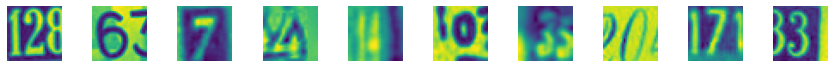

Labels for each of the above respective testing images: [2 6 7 4 4 0 3 0 7 3]


In [15]:
# Blurred training images 
%matplotlib inline
plt.figure(figsize=(15, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(xtrain_blurred[i])
    plt.axis('off')
plt.show()
print('Labels for each of the above respective testing images: %s' % (ytrain[0:10]))

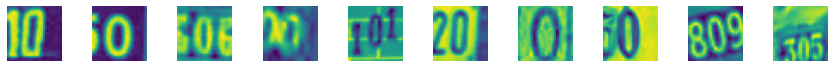

Labels for each of the above respective testing images: [0 0 0 0 0 0 0 0 0 0]


In [16]:
# Blurred validation images 
%matplotlib inline
plt.figure(figsize=(15, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(xval_blurred[i])
    plt.axis('off')
plt.show()
print('Labels for each of the above respective testing images: %s' % (yval[0:10]))

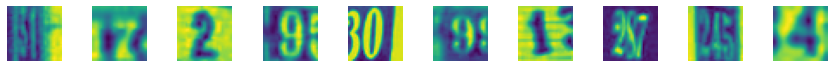

Labels for each of the above respective testing images: [1 7 2 9 0 9 1 8 4 4]


In [17]:
# Blurred testing images 
%matplotlib inline
plt.figure(figsize=(15, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(xtest_blurred[i])
    plt.axis('off')
plt.show()
print('Labels for each of the above respective testing images: %s' % (ytest[0:10]))

**Reshape and print the data in xtest, xtrain, and xval.**

In [18]:
xtrain = xtrain_blurred.reshape(xtrain.shape[0],1024)
xval = xval_blurred.reshape(xval.shape[0],1024)
xtest = xtest_blurred.reshape(xtest.shape[0],1024)
print(xtrain.shape,xval.shape,xtest.shape)

(42000, 1024) (60000, 1024) (18000, 1024)


**Next, the data is normalized.**

In [19]:
# Normalize inputs from 0-255 to 0-1; to be used with the eventual neural network.

xtrain = xtrain/255.0
xval = xval/255.0
xtest = xtest/255.0

**Flatten the data so that it is ready to be fed into the eventual model(s).**

In [20]:
# Flatten the data
x_train = []
x_test = []
x_val = []
for i in range(42000):
    x_train.append(xtrain[i,:].flatten())
for i in range(60000):
    x_val.append(xval[i,:].flatten())
for i in range(18000):
    x_test.append(xtest[i,:].flatten())

**The dataset is quite large so let us take subsets of it in order to reduce the computational resource challenges.**

In [21]:
# Subset 4000 records for training, 1000 records for testing, and 2000 records for validation respectively.
x_train = x_train[:4000]
ytrain= ytrain[:4000]
x_test = x_test[:1000]
ytest = ytest[:1000]
x_val = x_val[:2000]
yval = yval[:2000]

**K Nearest Neighbor Classifier Model.**

In [22]:
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
val_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, ytrain)
    train_accuracy[i] = knn.score(x_train, ytrain)
    val_accuracy[i] = knn.score(x_val, yval)

In [23]:
for i in range(len(train_accuracy)):
    print(train_accuracy[i],val_accuracy[i])

1.0 0.3955
0.645 0.5465
0.59625 0.5915
0.58825 0.581
0.57575 0.554
0.55925 0.535
0.54325 0.5135
0.53575 0.5175
0.52375 0.51
0.51675 0.5145
0.5045 0.5245
0.50025 0.52
0.49925 0.5025
0.49425 0.507


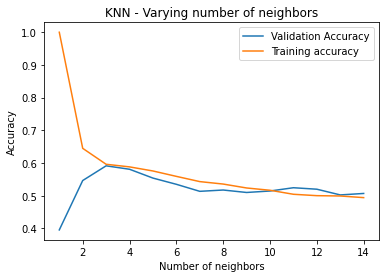

In [24]:
plt.title('KNN - Varying number of neighbors')
plt.plot(neighbors, val_accuracy, label='Validation Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

**The graph above seems to indicate that 3 or 4 will be the best values; therefore, we can retrain the model with the best value of K.**

In [25]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(x_train, ytrain)
predictions = model.predict(x_test)



In [26]:
print(predictions[:3])

[1 7 1]


In [27]:
print(predictions[:5])

[1 7 1 8 0]


In [28]:
print(predictions[:7])

[1 7 1 8 0 9 1]


In [29]:
print(predictions[:10])

[1 7 1 8 0 9 1 4 1 1]


In [30]:

print("Testing Data Evaluation")
print(classification_report(ytest, predictions))
cm = confusion_matrix(ytest,predictions)
print ("Confusion Matrix")
print(confusion_matrix(ytest,predictions))

Testing Data Evaluation
              precision    recall  f1-score   support

           0       0.29      0.57      0.39       117
           1       0.31      0.65      0.42        93
           2       0.26      0.24      0.25        92
           3       0.22      0.27      0.24        85
           4       0.55      0.43      0.48        96
           5       0.37      0.19      0.25       105
           6       0.33      0.22      0.27        94
           7       0.66      0.42      0.51       107
           8       0.38      0.21      0.27       100
           9       0.39      0.24      0.30       111

    accuracy                           0.35      1000
   macro avg       0.38      0.34      0.34      1000
weighted avg       0.38      0.35      0.34      1000

Confusion Matrix
[[67  5  5  8  6  4  7  2  7  6]
 [ 9 60  7  9  3  1  2  1  0  1]
 [11 23 22 14  2  3  2  5  4  6]
 [15 17  9 23  2  7  3  3  3  3]
 [14 20  6  4 41  2  1  2  4  2]
 [20 17  9 18  1 20  8  1  6  5]
 [

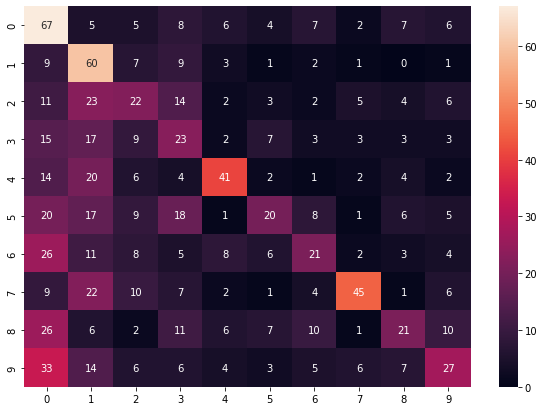

In [31]:
#import the seaborn library in order to display a more attractive and easier to read correlation matrix.

import seaborn as sns 

df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                     columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

**Observations:**

* 9s (nines) and 0s (zeros) are the numbers most often misclassified.
* 6s (sixes) and 0s (zeros) are also misclassified frequently.
* 8s (eights) and 0s (zeros) too.
* All the rest of the numbers are often misclassified as zeros too.
* All the numbers are also misclassified as 1 or 2 on a less than ideal frequency too.

In [32]:
def accuracy(val1,val2):
    count = 0
    for i in range(len(val1)):
        if val1[i] == val2[i]:
            count = count +1
    acc = count / len(val1)
    return acc

In [33]:
my_accuracy = accuracy(ytest,predictions)
print(my_accuracy)

0.347


**Unsatisfactory accuracy score at 0.347.**

**Let us retrain the model with best value of K.**

In [34]:
model = KNeighborsClassifier(n_neighbors=15)
model.fit(x_train, ytrain)
predictions = model.predict(x_test)



In [35]:
print("Testing Data Evaluation")
print(classification_report(ytest, predictions))
cm = confusion_matrix(ytest,predictions)
print ("Confusion Matrix")
print(confusion_matrix(ytest,predictions))

Testing Data Evaluation
              precision    recall  f1-score   support

           0       0.35      0.62      0.44       117
           1       0.31      0.56      0.40        93
           2       0.44      0.36      0.40        92
           3       0.29      0.32      0.30        85
           4       0.47      0.45      0.46        96
           5       0.40      0.18      0.25       105
           6       0.31      0.27      0.29        94
           7       0.58      0.49      0.53       107
           8       0.44      0.27      0.33       100
           9       0.35      0.26      0.30       111

    accuracy                           0.38      1000
   macro avg       0.39      0.38      0.37      1000
weighted avg       0.39      0.38      0.37      1000

Confusion Matrix
[[72  6  1  3 12  3  8  2  4  6]
 [11 52  5  7  5  3  5  4  1  0]
 [ 3 15 33 11  2  1  3  8  7  9]
 [11 16  7 27  0  7  4  6  5  2]
 [ 8 16  4  7 43  1  7  3  1  6]
 [20 20  6 13  1 19 11  2  5  8]
 [

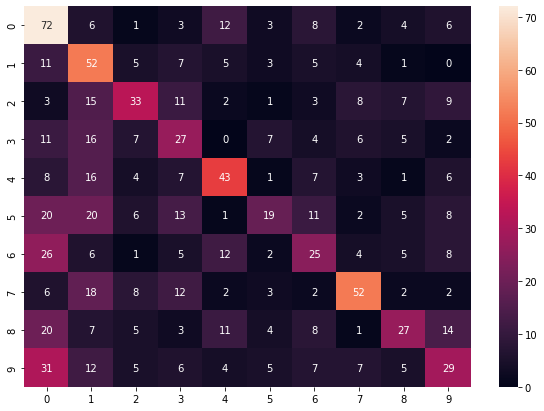

In [36]:
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                     columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

**Observations:**

* 9s (nines) and 0s (zeros) are the numbers most often misclassified.
* 6s (sixes) and 0s (zeros) are also misclassified frequently.
* 8s (eights) and 0s (zeros) too.
* All the rest of the numbers are often misclassified as zeros too.
* All the numbers are also misclassified as 1 or 2 on a less than ideal frequency too.

In [37]:
def accuracy(val1,val2):
    count = 0
    for i in range(len(val1)):
        if val1[i] == val2[i]:
            count = count +1
    acc = count / len(val1)
    return acc

In [38]:
my_accuracy = accuracy(ytest,predictions)
print(my_accuracy)

0.379


**The model has not learned properly because it is underfitting with training data hovering at an average of 55% and test data achieving 38%.**

<br>

**Let us try a GridSearch cross validation with the KNN Classifier to see if it improves upon the staus quo.**

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(7,21)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_train,ytrain)


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [40]:
knn_cv.best_score_

0.32649999999999996

**No improvement in the score.**

## **Neural Network**

In [41]:
import tensorflow as tf
import keras
from keras import losses
from keras.models import Sequential
#from keras import optimizers
from keras.layers import MaxPooling2D,BatchNormalization,Dense
from tensorflow.keras import optimizers

In [42]:
with h5py.File("/content/drive/My Drive/SVHN_single_grey1.h5",'r') as h5f:
    print(list(h5f.keys()))
    xtrain = np.array(h5f.get('X_train'))
    ytrain = np.array(h5f.get('y_train'))
    xtest  = np.array(h5f.get('X_test'))
    ytest  = np.array(h5f.get('y_test'))
    xval   = np.array(h5f.get('X_val'))
    yval   = np.array(h5f.get('y_val'))

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [43]:
print('Training dataset:', xtrain.shape, ytrain.shape)
print('Test dataset:', xtest.shape, ytest.shape)
print('Validation dataset:', xval.shape, yval.shape)

Training dataset: (42000, 32, 32) (42000,)
Test dataset: (18000, 32, 32) (18000,)
Validation dataset: (60000, 32, 32) (60000,)


**Let us reshape the data.**

In [44]:
## Reshape the data for X
xtrain = xtrain.reshape(xtrain.shape[0],1024)
xtest =xtest.reshape(xtest.shape[0],1024)
xval = xval.reshape(xval.shape[0],1024)

**Normalize the data so that pixel values range from 0 to 1 rather that 1 to 255.**

In [45]:
xtrain = xtrain/255
xtest = xtest/255
xval = xval/255

In [46]:
print('Training dataset:', xtrain.shape, ytrain.shape)
print('Test dataset:', xtest.shape, ytest.shape)
print('Validation dataset:', xval.shape, yval.shape)

Training dataset: (42000, 1024) (42000,)
Test dataset: (18000, 1024) (18000,)
Validation dataset: (60000, 1024) (60000,)


**One Hot Encode the label data (y) as there are currently 10 of them.**

In [47]:
y_train = np_utils.to_categorical(ytrain)
y_test = np_utils.to_categorical(ytest)
y_val = np_utils.to_categorical(yval)

In [48]:
print('Training dataset:', xtrain.shape, y_train.shape)
print('Validation dataset:',xval.shape,y_val.shape)
print('Test dataset:', xtest.shape, y_test.shape)

Training dataset: (42000, 1024) (42000, 10)
Validation dataset: (60000, 1024) (60000, 10)
Test dataset: (18000, 1024) (18000, 10)


### **1) ReLU Activation Function Tweaking the Learning Rate.**

In [49]:
def NN_model_Dense(learning_rate):
    
    model = Sequential()
    model.add(Dense(256, activation='relu',input_shape = (1024, )))
    model.add(Dense(64,activation='relu'))    
    model.add(Dense(32,activation='relu'))  
    model.add(Dense(10,activation='softmax'))
    
    sgd = optimizers.SGD(lr = learning_rate)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


In [50]:
# Learning rate = 0.001

model_Dense = NN_model_Dense(0.001)
NN_model_Dense_history = model_Dense.fit(xtrain, y_train, epochs = 10, verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
1313/1313 [==============================] - 5s 3ms/step - loss: 2.3045 - accuracy: 0.1025
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 2.2931 - accuracy: 0.1180
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 2.2851 - accuracy: 0.1335
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 2.2773 - accuracy: 0.1501
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 2.2687 - accuracy: 0.1665
Epoch 6/10
1313/1313 [==============================] - 4s 3ms/step - loss: 2.2578 - accuracy: 0.1802
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 2.2452 - accuracy: 0.1983
Epoch 8/10
1313/1313 [==============================] - 4s 3ms/step - loss: 2.2309 - accuracy: 0.2100
Epoch 9/10
1313/1313 [==============================] - 4s 3ms/step - loss: 2.2143 - accuracy: 0.2213
Epoch 10/10
1313/1313 [==============================] - 4s 3ms/step - loss: 2.196

In [51]:
# Learning rate = 0.005

model_Dense = NN_model_Dense(0.005)
NN_model_Dense_history = model_Dense.fit(xtrain, y_train, epochs = 30, verbose = 1)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


1313/1313 [==============================] - 4s 3ms/step - loss: 2.2982 - accuracy: 0.1223
Epoch 2/30
1313/1313 [==============================] - 4s 3ms/step - loss: 2.2795 - accuracy: 0.1612
Epoch 3/30
1313/1313 [==============================] - 4s 3ms/step - loss: 2.2420 - accuracy: 0.2078
Epoch 4/30
1313/1313 [==============================] - 4s 3ms/step - loss: 2.1563 - accuracy: 0.2502
Epoch 5/30
1313/1313 [==============================] - 4s 3ms/step - loss: 2.0096 - accuracy: 0.3132
Epoch 6/30
1313/1313 [==============================] - 4s 3ms/step - loss: 1.8287 - accuracy: 0.3885
Epoch 7/30
1313/1313 [==============================] - 4s 3ms/step - loss: 1.6459 - accuracy: 0.4610
Epoch 8/30
1313/1313 [==============================] - 4s 3ms/step - loss: 1.5064 - accuracy: 0.5120
Epoch 9/30
1313/1313 [==============================] - 4s 3ms/step - loss: 1.4111 - accuracy: 0.5461
Epoch 10/30
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3328 - accurac

In [52]:
# Learning rate = 0.01

model_Dense = NN_model_Dense(0.01)
NN_model_Dense_history = model_Dense.fit(xtrain, y_train, epochs = 40, verbose = 1)

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


1313/1313 [==============================] - 4s 3ms/step - loss: 2.2756 - accuracy: 0.1539
Epoch 2/40
1313/1313 [==============================] - 4s 3ms/step - loss: 2.0725 - accuracy: 0.2974
Epoch 3/40
1313/1313 [==============================] - 4s 3ms/step - loss: 1.6734 - accuracy: 0.4398
Epoch 4/40
1313/1313 [==============================] - 4s 3ms/step - loss: 1.4335 - accuracy: 0.5326
Epoch 5/40
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3107 - accuracy: 0.5773
Epoch 6/40
1313/1313 [==============================] - 4s 3ms/step - loss: 1.2307 - accuracy: 0.6086
Epoch 7/40
1313/1313 [==============================] - 4s 3ms/step - loss: 1.1672 - accuracy: 0.6339
Epoch 8/40
1313/1313 [==============================] - 4s 3ms/step - loss: 1.1179 - accuracy: 0.6540
Epoch 9/40
1313/1313 [==============================] - 4s 3ms/step - loss: 1.0798 - accuracy: 0.6681
Epoch 10/40
1313/1313 [==============================] - 4s 3ms/step - loss: 1.0444 - accurac

In [53]:
# Learning rate = 0.1

model_Dense = NN_model_Dense(0.1)
NN_model_Dense_history = model_Dense.fit(xtrain, y_train, epochs = 55, verbose = 1)

Epoch 1/55


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


1313/1313 [==============================] - 4s 3ms/step - loss: 2.2484 - accuracy: 0.1541
Epoch 2/55
1313/1313 [==============================] - 4s 3ms/step - loss: 1.8104 - accuracy: 0.3653
Epoch 3/55
1313/1313 [==============================] - 4s 3ms/step - loss: 1.4456 - accuracy: 0.5134
Epoch 4/55
1313/1313 [==============================] - 4s 3ms/step - loss: 1.2759 - accuracy: 0.5830
Epoch 5/55
1313/1313 [==============================] - 4s 3ms/step - loss: 1.1704 - accuracy: 0.6243
Epoch 6/55
1313/1313 [==============================] - 4s 3ms/step - loss: 1.0877 - accuracy: 0.6540
Epoch 7/55
1313/1313 [==============================] - 4s 3ms/step - loss: 1.0265 - accuracy: 0.6749
Epoch 8/55
1313/1313 [==============================] - 4s 3ms/step - loss: 0.9843 - accuracy: 0.6866
Epoch 9/55
1313/1313 [==============================] - 4s 3ms/step - loss: 0.9425 - accuracy: 0.7009
Epoch 10/55
1313/1313 [==============================] - 4s 3ms/step - loss: 0.9057 - accurac

In [54]:
# Learning rate = 0.05

model_Dense = NN_model_Dense(0.05)
NN_model_Dense_history = model_Dense.fit(xtrain, y_train, epochs = 50, verbose = 1)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


1313/1313 [==============================] - 4s 3ms/step - loss: 2.2024 - accuracy: 0.1752
Epoch 2/50
1313/1313 [==============================] - 4s 3ms/step - loss: 1.6653 - accuracy: 0.4276
Epoch 3/50
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3603 - accuracy: 0.5505
Epoch 4/50
1313/1313 [==============================] - 4s 3ms/step - loss: 1.2033 - accuracy: 0.6100
Epoch 5/50
1313/1313 [==============================] - 4s 3ms/step - loss: 1.0983 - accuracy: 0.6505
Epoch 6/50
1313/1313 [==============================] - 4s 3ms/step - loss: 1.0264 - accuracy: 0.6745
Epoch 7/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.9748 - accuracy: 0.6928
Epoch 8/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.9311 - accuracy: 0.7073
Epoch 9/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.8972 - accuracy: 0.7178
Epoch 10/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.8612 - accurac

In [55]:
results = model_Dense.evaluate(xtest, y_test)
print(results)

563/563 [==============================] - 1s 2ms/step - loss: 0.7120 - accuracy: 0.7910
[0.7120397686958313, 0.7910000085830688]


**Observations:**

* A learning rate of 0.001 yields a loss of 2.1960 and an 
accuracy of 0.2367. 
* A learning rate of 0.005 yields a loss of 0.8015 and an accuracy of 0.7537. 
* A learning rate of 0.01 yields a loss of 0.5833 and an accuracy of 0.8220. 
* A learning rate of 0.1 yields a loss of 0.5194 and an accuracy of 0.8368. 
* A learning rate of 0.05 yields a loss of 0.4809 and an accuracy of 0.8485. 

<BR>

The 0.05 learning rate produces the highest accuracy at 0.85 (not high enough) and the lowest losss so far of 0.48 (not low enough).



### **2) Next, Batch Normalization tweaking.**

In [56]:
from keras.utils import np_utils
def nn_model():
    model = Sequential()
    model.add(BatchNormalization())
    model.add(Dense(256,activation = 'relu'))
    model.add(Dense(64,activation = 'relu'))
    model.add(Dense(32,activation = 'relu'))
    model.add(Dense(16,activation = 'relu'))
    model.add(Dense(10,activation = 'softmax'))
    
    sgd = optimizers.Adam(lr = 1e-3)
    model.compile(loss = losses.categorical_crossentropy,optimizer=sgd,metrics = ['accuracy'])
    return model

    sgd = optimizers.SGD(lr = learning_rate)

In [57]:
model_seq = nn_model()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [58]:
# Batch size = 300 with 50 epochs.

NN_Built_model = model_seq.fit(xtrain,y_train,validation_data = (xval,y_val),epochs = 50,batch_size = 300,verbose = 1)

Epoch 1/50
140/140 [==============================] - 4s 26ms/step - loss: 1.7552 - accuracy: 0.3859 - val_loss: 1.5836 - val_accuracy: 0.5792
Epoch 2/50
140/140 [==============================] - 3s 24ms/step - loss: 1.0979 - accuracy: 0.6588 - val_loss: 1.0523 - val_accuracy: 0.7023
Epoch 3/50
140/140 [==============================] - 3s 24ms/step - loss: 0.8878 - accuracy: 0.7251 - val_loss: 0.8297 - val_accuracy: 0.7479
Epoch 4/50
140/140 [==============================] - 3s 24ms/step - loss: 0.7760 - accuracy: 0.7602 - val_loss: 0.7405 - val_accuracy: 0.7738
Epoch 5/50
140/140 [==============================] - 3s 24ms/step - loss: 0.7116 - accuracy: 0.7802 - val_loss: 0.6717 - val_accuracy: 0.7953
Epoch 6/50
140/140 [==============================] - 3s 24ms/step - loss: 0.6531 - accuracy: 0.7976 - val_loss: 0.6260 - val_accuracy: 0.8091
Epoch 7/50
140/140 [==============================] - 3s 24ms/step - loss: 0.6034 - accuracy: 0.8150 - val_loss: 0.5934 - val_accuracy: 0.8207


**Batch normalization (with 50 epochs) helped improve the validation accuracy to 0.9121 and decrease the loss to 0.3621 compared to the earlier model implementation without batch normalization.**

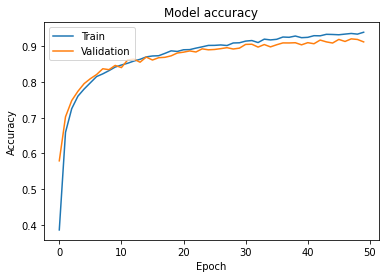

In [59]:
# Plot training & validation accuracy values

plt.plot(NN_Built_model.history['accuracy'])
plt.plot(NN_Built_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

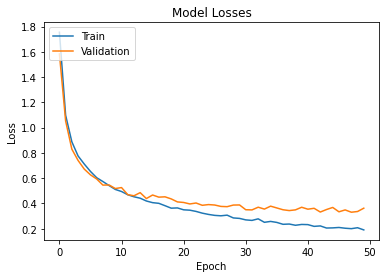

In [60]:
# Plot training & validation losses values

plt.plot(NN_Built_model.history['loss'])
plt.plot(NN_Built_model.history['val_loss'])
plt.title('Model Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**
<BR>
In comparison with K Nearest Neigbors the Neural Network implementing Batch Normalization has a better accuracy above the 90th percentile. The accuracy in the training dataset and the accuracy in the validation dataset are close in value. Loss is also improving in both.

In [61]:
model_seq.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (300, 1024)               4096      
_________________________________________________________________
dense_20 (Dense)             (300, 256)                262400    
_________________________________________________________________
dense_21 (Dense)             (300, 64)                 16448     
_________________________________________________________________
dense_22 (Dense)             (300, 32)                 2080      
_________________________________________________________________
dense_23 (Dense)             (300, 16)                 528       
_________________________________________________________________
dense_24 (Dense)             (300, 10)                 170       
Total params: 285,722
Trainable params: 283,674
Non-trainable params: 2,048
____________________________________________

In [62]:
# Batch size = 300 with 50 epochs.

NN_Built_model = model_seq.fit(xtest,y_test,epochs = 50,batch_size = 300,verbose = 1)

Epoch 1/50
60/60 [==============================] - 1s 18ms/step - loss: 0.7393 - accuracy: 0.8106
Epoch 2/50
60/60 [==============================] - 1s 17ms/step - loss: 0.5347 - accuracy: 0.8411
Epoch 3/50
60/60 [==============================] - 1s 17ms/step - loss: 0.4696 - accuracy: 0.8593
Epoch 4/50
60/60 [==============================] - 1s 17ms/step - loss: 0.4225 - accuracy: 0.8716
Epoch 5/50
60/60 [==============================] - 1s 17ms/step - loss: 0.3783 - accuracy: 0.8834
Epoch 6/50
60/60 [==============================] - 1s 17ms/step - loss: 0.3540 - accuracy: 0.8899
Epoch 7/50
60/60 [==============================] - 1s 17ms/step - loss: 0.3284 - accuracy: 0.8977
Epoch 8/50
60/60 [==============================] - 1s 17ms/step - loss: 0.3032 - accuracy: 0.9059
Epoch 9/50
60/60 [==============================] - 1s 17ms/step - loss: 0.2914 - accuracy: 0.9091
Epoch 10/50
60/60 [==============================] - 1s 17ms/step - loss: 0.2764 - accuracy: 0.9139
Epoch 11/

**Observations:**

The neural network model has performed well on test data with improved accuracy ~ 96% (0.9564) and loss decrease ~ 10% (0.0970).

In [63]:
model_seq.evaluate(xtest,y_test)

563/563 [==============================] - 2s 3ms/step - loss: 0.0471 - accuracy: 0.9879


[0.04714522138237953, 0.9879444241523743]

In [64]:
print(model_seq.metrics_names)
print(NN_Built_model)

['loss', 'accuracy']


In [65]:
NN_Model_Predicted_Y = np.argmax(model_seq.predict(xtest), axis=-1)

In [66]:
#print(ytest[:10],NN_Model_Predicted_Y[:10])
print("Actual labels:    {}".format(ytest[:10]))
print("Predicted labels: {}\n".format(NN_Model_Predicted_Y[:10]))

Actual labels:    [1 7 2 9 0 9 1 8 4 4]
Predicted labels: [1 7 2 9 0 9 1 8 4 4]



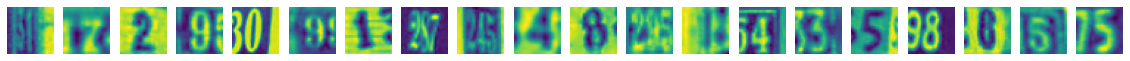

Label for each of the above respective images: [1 7 2 9 0 9 1 8 4 4 8 9 1 4 3 5 8 6 5 5]


In [67]:
plt.figure(figsize=(20, 1))
for i in range(20):
    plt.subplot(1, 20, i+1)
    plt.imshow(xtest[i].reshape(32,32))
    plt.axis('off')
plt.show()
print('Label for each of the above respective images: %s' % (ytest[:20]))

In [68]:
#print(ytest[11:25],NN_Model_Predicted_Y[11:25])
print("Actual labels:    {}".format(ytest[11:25]))
print("Predicted labels: {}\n".format(NN_Model_Predicted_Y[11:25]))

Actual labels:    [9 1 4 3 5 8 6 5 5 0 6 5 8 3]
Predicted labels: [9 1 4 3 5 8 6 5 5 0 6 5 8 3]



All correctly predicted above.

In [69]:
#print(ytest[30:55],NN_Model_Predicted_Y[30:55])
print("Actual labels:    {}".format(ytest[30:55]))
print("Predicted labels: {}\n".format(NN_Model_Predicted_Y[30:55]))

Actual labels:    [2 8 9 1 0 9 5 3 3 7 6 4 2 4 9 6 7 8 8 3 5 3 7 1 4]
Predicted labels: [2 8 9 1 0 9 5 3 3 7 6 4 2 4 9 6 7 8 8 3 5 3 7 1 4]



All correctly predicted above.

In [70]:
#print(ytest[60:70],NN_Model_Predicted_Y[60:70])
print("Actual labels:    {}".format(ytest[60:70]))
print("Predicted labels: {}\n".format(NN_Model_Predicted_Y[60:70]))

Actual labels:    [0 1 5 9 9 2 2 2 4 8]
Predicted labels: [0 1 5 9 9 2 2 2 4 8]



All correctly predicted above.

In [71]:
#print(ytest[75:85],NN_Model_Predicted_Y[75:85])
print("Actual labels:    {}".format(ytest[75:85]))
print("Predicted labels: {}\n".format(NN_Model_Predicted_Y[75:85]))

Actual labels:    [5 2 8 6 4 5 4 2 8 2]
Predicted labels: [5 2 8 6 9 5 4 2 8 2]



All correct except a 9 was predicted instead of a 4.

In [72]:
#print(ytest[90:105],NN_Model_Predicted_Y[90:105])
print("Actual labels:    {}".format(ytest[90:105]))
print("Predicted labels: {}\n".format(NN_Model_Predicted_Y[90:105]))

Actual labels:    [3 2 7 5 0 7 6 9 8 7 2 7 5 2 1]
Predicted labels: [3 2 7 5 0 7 6 9 8 7 2 7 5 2 1]



All correctly predicted above.

In [73]:
cm = confusion_matrix(ytest,NN_Model_Predicted_Y)
print ("Confusion Matrix")
print(confusion_matrix(ytest,NN_Model_Predicted_Y))

Confusion Matrix
[[1801    4    1    0    1    0    3    3    1    0]
 [   2 1810    1    2    0    1    2    9    0    1]
 [   1    5 1781    1    0    0    1    4    3    7]
 [   1    3    2 1683    0    7    2    6    8    7]
 [   2    7    2    1 1794    0    0    1    0    5]
 [   0    1    0    7    0 1748    4    3    3    2]
 [   2    1    2    0    3    5 1806    4    8    1]
 [   2    8    2    0    1    0    1 1793    0    1]
 [   2    6    0    1    0    2    8    1 1787    5]
 [   8    5    3    2    2    0    0    1    3 1780]]


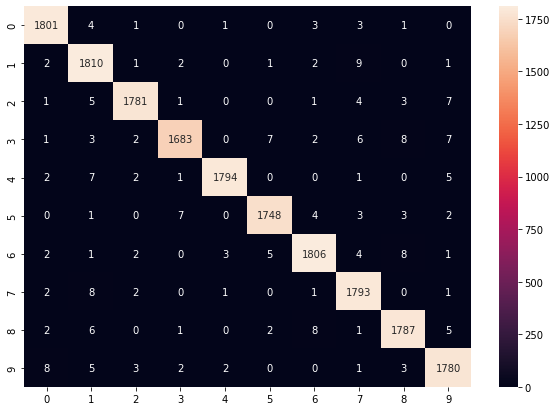

In [74]:
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                     columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

**Observations:**

Some of the images are blurry; the Neural Network is somewhat predicting fairly well with some mistakes/misclassifications; perhaps Accuracy can be further improved upon by tweaking or refining data augumentation, drop outs etc..


### **3) Dropout**

In [75]:
def nn_model_with_dropouts():
    model = Sequential()
    model.add(BatchNormalization())
    model.add(Dense(256,activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(34,activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10,activation = 'softmax'))
    
    sgd = optimizers.Adam(lr = 1e-3)
    model.compile(loss = losses.categorical_crossentropy,optimizer=sgd,metrics = ['accuracy'])
    return model

In [76]:
from keras.layers import Dropout
nn_seq_dropout = nn_model_with_dropouts()
Dropout_NN = nn_seq_dropout.fit(xtrain,y_train,validation_data = (xval,y_val),epochs = 50,batch_size = 300,verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
140/140 [==============================] - 4s 27ms/step - loss: 2.3594 - accuracy: 0.1140 - val_loss: 2.2830 - val_accuracy: 0.1666
Epoch 2/50
140/140 [==============================] - 3s 24ms/step - loss: 2.1271 - accuracy: 0.2136 - val_loss: 1.9106 - val_accuracy: 0.4263
Epoch 3/50
140/140 [==============================] - 3s 25ms/step - loss: 1.8863 - accuracy: 0.3243 - val_loss: 1.5253 - val_accuracy: 0.5681
Epoch 4/50
140/140 [==============================] - 3s 25ms/step - loss: 1.7498 - accuracy: 0.3795 - val_loss: 1.3601 - val_accuracy: 0.6242
Epoch 5/50
140/140 [==============================] - 3s 24ms/step - loss: 1.6655 - accuracy: 0.4159 - val_loss: 1.2622 - val_accuracy: 0.6490
Epoch 6/50
140/140 [==============================] - 4s 26ms/step - loss: 1.5845 - accuracy: 0.4444 - val_loss: 1.1740 - val_accuracy: 0.6741
Epoch 7/50
140/140 [==============================] - 3s 24ms/step - loss: 1.5235 - accuracy: 0.4665 - val_loss: 1.1111 - val_accuracy: 0.6954

**Observations:**
<br>

Compared to the previous method, Dropout did not improve the situation. Here validation accuracy is higher than training accuracy, leading to Underfitting. Additionally, the loss is unacceptably high.

In [77]:
result_dropout = nn_seq_dropout.evaluate(xtest,y_test)

563/563 [==============================] - 2s 2ms/step - loss: 0.6214 - accuracy: 0.8224


In [78]:
print(result_dropout)

[0.6214193105697632, 0.8223888874053955]


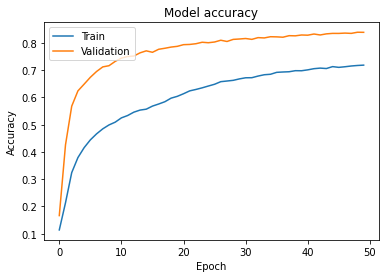

In [79]:
# Plot training & validation accuracy values
plt.plot(Dropout_NN.history['accuracy'])
plt.plot(Dropout_NN.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

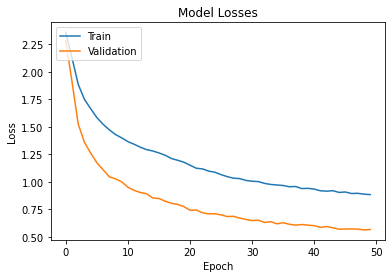

In [80]:
# Plot training & validation loss
plt.plot(Dropout_NN.history['loss'])
plt.plot(Dropout_NN.history['val_loss'])
plt.title('Model Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **4) Using Activation functions and kernal "he_normal" initializer.**

In [81]:
def NN_activation(activation_fun,learn_rate):
    model = Sequential()
    
    model.add(Dense(256, activation = activation_fun,input_shape = (1024, ), kernel_initializer='he_normal'))     
    model.add(Dense(124, activation=activation_fun,kernel_initializer='he_normal'))                            
    model.add(Dense(64, activation = activation_fun,kernel_initializer='he_normal'))                           
    model.add(Dense(32, activation= activation_fun, kernel_initializer='he_normal'))    
    model.add(Dense(10, activation='softmax',kernel_initializer='he_normal'))                            
   
    sgd = optimizers.SGD(lr = learn_rate)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

**Sigmoid function:**

In [82]:
# "He_Normal" Kernal Initializer with Sigmoid function and Learning Rate of 0.001.

model = NN_activation('sigmoid',0.001)
model_history = model.fit(xtrain,y_train,validation_data = (xval,y_val),epochs = 50,batch_size = 300,verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
140/140 [==============================] - 3s 20ms/step - loss: 2.5671 - accuracy: 0.0999 - val_loss: 2.5329 - val_accuracy: 0.1000
Epoch 2/50
140/140 [==============================] - 3s 19ms/step - loss: 2.5104 - accuracy: 0.0999 - val_loss: 2.4839 - val_accuracy: 0.1000
Epoch 3/50
140/140 [==============================] - 3s 19ms/step - loss: 2.4668 - accuracy: 0.0999 - val_loss: 2.4458 - val_accuracy: 0.1000
Epoch 4/50
140/140 [==============================] - 3s 19ms/step - loss: 2.4326 - accuracy: 0.0999 - val_loss: 2.4158 - val_accuracy: 0.1000
Epoch 5/50
140/140 [==============================] - 3s 19ms/step - loss: 2.4055 - accuracy: 0.0999 - val_loss: 2.3920 - val_accuracy: 0.1000
Epoch 6/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3840 - accuracy: 0.0999 - val_loss: 2.3730 - val_accuracy: 0.1000
Epoch 7/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3667 - accuracy: 0.0999 - val_loss: 2.3579 - val_accuracy: 0.1000

In [83]:
# "He_Normal" Kernal Initializer with Sigmoid function and Learning Rate of 0.005.

model = NN_activation('sigmoid',0.005)
model_history = model.fit(xtrain,y_train,validation_data = (xval,y_val),epochs = 50,batch_size = 300,verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
140/140 [==============================] - 3s 20ms/step - loss: 2.4781 - accuracy: 0.0997 - val_loss: 2.3707 - val_accuracy: 0.1000
Epoch 2/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3366 - accuracy: 0.0997 - val_loss: 2.3161 - val_accuracy: 0.1000
Epoch 3/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3091 - accuracy: 0.1001 - val_loss: 2.3051 - val_accuracy: 0.1000
Epoch 4/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3038 - accuracy: 0.0998 - val_loss: 2.3030 - val_accuracy: 0.1033
Epoch 5/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3028 - accuracy: 0.1017 - val_loss: 2.3027 - val_accuracy: 0.1014
Epoch 6/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3027 - accuracy: 0.1012 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 7/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3026 - accuracy: 0.1018 - val_loss: 2.3026 - val_accuracy: 0.1006

In [84]:
# "He_Normal" Kernal Initializer with Sigmoid function and Learning Rate of 0.01.

model = NN_activation('sigmoid',0.01)
model_history = model.fit(xtrain,y_train,validation_data = (xval,y_val),epochs = 50,batch_size = 300,verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
140/140 [==============================] - 3s 20ms/step - loss: 2.3399 - accuracy: 0.0996 - val_loss: 2.3091 - val_accuracy: 0.0966
Epoch 2/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3048 - accuracy: 0.0984 - val_loss: 2.3030 - val_accuracy: 0.0999
Epoch 3/50
140/140 [==============================] - 3s 20ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0967
Epoch 4/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3027 - accuracy: 0.1010 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3027 - accuracy: 0.1013 - val_loss: 2.3026 - val_accuracy: 0.0990
Epoch 7/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3027 - accuracy: 0.1005 - val_loss: 2.3026 - val_accuracy: 0.1013

In [85]:
# "He_Normal" Kernal Initializer with Sigmoid function and Learning Rate of 0.1.

model = NN_activation('sigmoid',0.1)
model_history = model.fit(xtrain,y_train,validation_data = (xval,y_val),epochs = 50,batch_size = 300,verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
140/140 [==============================] - 3s 21ms/step - loss: 2.3117 - accuracy: 0.0995 - val_loss: 2.3032 - val_accuracy: 0.0954
Epoch 2/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3037 - accuracy: 0.0984 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 3/50
140/140 [==============================] - 3s 20ms/step - loss: 2.3036 - accuracy: 0.1001 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 4/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3034 - accuracy: 0.1012 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 5/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3035 - accuracy: 0.0988 - val_loss: 2.3039 - val_accuracy: 0.1001
Epoch 6/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3035 - accuracy: 0.0980 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 7/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3035 - accuracy: 0.0988 - val_loss: 2.3035 - val_accuracy: 0.1000

In [86]:
# "He_Normal" Kernal Initializer with Sigmoid function and Learning Rate of 0.05.

model = NN_activation('sigmoid',0.05)
model_history = model.fit(xtrain,y_train,validation_data = (xval,y_val),epochs = 50,batch_size = 300,verbose = 1)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


140/140 [==============================] - 3s 20ms/step - loss: 2.3136 - accuracy: 0.0969 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3032 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1005
Epoch 3/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3030 - accuracy: 0.1013 - val_loss: 2.3028 - val_accuracy: 0.1003
Epoch 4/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3029 - accuracy: 0.1024 - val_loss: 2.3029 - val_accuracy: 0.1022
Epoch 5/50
140/140 [==============================] - 3s 18ms/step - loss: 2.3031 - accuracy: 0.0983 - val_loss: 2.3031 - val_accuracy: 0.1001
Epoch 6/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3030 - accuracy: 0.1003 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 7/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3031 - accuracy: 0.1004 - val_loss: 2.3027 - val_accuracy: 0.0963
Epoch 8/50

**Relu function:**

In [87]:
# "He_Normal" Kernal Initializer with Relu function and Learning Rate of 0.001.

model = NN_activation('relu',0.001)
model_history = model.fit(xtrain,y_train,validation_data = (xval,y_val),epochs = 50,batch_size = 300,verbose = 1)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


140/140 [==============================] - 3s 20ms/step - loss: 2.3361 - accuracy: 0.1007 - val_loss: 2.3120 - val_accuracy: 0.1061
Epoch 2/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3077 - accuracy: 0.1073 - val_loss: 2.3042 - val_accuracy: 0.1112
Epoch 3/50
140/140 [==============================] - 3s 19ms/step - loss: 2.3011 - accuracy: 0.1148 - val_loss: 2.2982 - val_accuracy: 0.1208
Epoch 4/50
140/140 [==============================] - 3s 19ms/step - loss: 2.2953 - accuracy: 0.1230 - val_loss: 2.2931 - val_accuracy: 0.1266
Epoch 5/50
140/140 [==============================] - 3s 19ms/step - loss: 2.2908 - accuracy: 0.1315 - val_loss: 2.2888 - val_accuracy: 0.1350
Epoch 6/50
140/140 [==============================] - 3s 18ms/step - loss: 2.2867 - accuracy: 0.1368 - val_loss: 2.2853 - val_accuracy: 0.1396
Epoch 7/50
140/140 [==============================] - 3s 19ms/step - loss: 2.2831 - accuracy: 0.1422 - val_loss: 2.2813 - val_accuracy: 0.1452
Epoch 8/50

In [88]:
# "He_Normal" Kernal Initializer with Relu function and Learning Rate of 0.005.

model = NN_activation('relu',0.005)
model_history = model.fit(xtrain,y_train,validation_data = (xval,y_val),epochs = 50,batch_size = 300,verbose = 1)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


140/140 [==============================] - 3s 20ms/step - loss: 2.3091 - accuracy: 0.1144 - val_loss: 2.2926 - val_accuracy: 0.1264
Epoch 2/50
140/140 [==============================] - 3s 19ms/step - loss: 2.2868 - accuracy: 0.1352 - val_loss: 2.2802 - val_accuracy: 0.1454
Epoch 3/50
140/140 [==============================] - 3s 19ms/step - loss: 2.2754 - accuracy: 0.1540 - val_loss: 2.2697 - val_accuracy: 0.1757
Epoch 4/50
140/140 [==============================] - 3s 19ms/step - loss: 2.2641 - accuracy: 0.1732 - val_loss: 2.2573 - val_accuracy: 0.1789
Epoch 5/50
140/140 [==============================] - 3s 18ms/step - loss: 2.2517 - accuracy: 0.1907 - val_loss: 2.2438 - val_accuracy: 0.2108
Epoch 6/50
140/140 [==============================] - 3s 18ms/step - loss: 2.2374 - accuracy: 0.2118 - val_loss: 2.2282 - val_accuracy: 0.2130
Epoch 7/50
140/140 [==============================] - 3s 18ms/step - loss: 2.2204 - accuracy: 0.2294 - val_loss: 2.2104 - val_accuracy: 0.2351
Epoch 8/50

In [89]:
# "He_Normal" Kernal Initializer with Relu function and Learning Rate of 0.01.

model = NN_activation('relu',0.01)
model_history = model.fit(xtrain,y_train,validation_data = (xval,y_val),epochs = 50,batch_size = 300,verbose = 1)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


140/140 [==============================] - 3s 19ms/step - loss: 2.2993 - accuracy: 0.1196 - val_loss: 2.2834 - val_accuracy: 0.1489
Epoch 2/50
140/140 [==============================] - 3s 18ms/step - loss: 2.2715 - accuracy: 0.1724 - val_loss: 2.2597 - val_accuracy: 0.1857
Epoch 3/50
140/140 [==============================] - 3s 18ms/step - loss: 2.2453 - accuracy: 0.2047 - val_loss: 2.2274 - val_accuracy: 0.2256
Epoch 4/50
140/140 [==============================] - 3s 19ms/step - loss: 2.2134 - accuracy: 0.2343 - val_loss: 2.1968 - val_accuracy: 0.2503
Epoch 5/50
140/140 [==============================] - 3s 19ms/step - loss: 2.1786 - accuracy: 0.2569 - val_loss: 2.1564 - val_accuracy: 0.2699
Epoch 6/50
140/140 [==============================] - 3s 19ms/step - loss: 2.1308 - accuracy: 0.2861 - val_loss: 2.1029 - val_accuracy: 0.2923
Epoch 7/50
140/140 [==============================] - 3s 19ms/step - loss: 2.0744 - accuracy: 0.3141 - val_loss: 2.0365 - val_accuracy: 0.3476
Epoch 8/50

In [ ]:
# "He_Normal" Kernal Initializer with Relu function and Learning Rate of 0.1.

model = NN_activation('relu',0.1)
model_history = model.fit(xtrain,y_train,validation_data = (xval,y_val),epochs = 50,batch_size = 300,verbose = 1)

In [91]:
# "He_Normal" Kernal Initializer with Relu function and Learning Rate of 0.05.

model = NN_activation('relu',0.05)
model_history = model.fit(xtrain,y_train,validation_data = (xval,y_val),epochs = 50,batch_size = 300,verbose = 1)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


140/140 [==============================] - 3s 20ms/step - loss: 2.2866 - accuracy: 0.1414 - val_loss: 2.2665 - val_accuracy: 0.1564
Epoch 2/50
140/140 [==============================] - 3s 19ms/step - loss: 2.2073 - accuracy: 0.2056 - val_loss: 2.1427 - val_accuracy: 0.2507
Epoch 3/50
140/140 [==============================] - 3s 19ms/step - loss: 2.0961 - accuracy: 0.2569 - val_loss: 2.0174 - val_accuracy: 0.3098
Epoch 4/50
140/140 [==============================] - 3s 19ms/step - loss: 1.9703 - accuracy: 0.3040 - val_loss: 1.8369 - val_accuracy: 0.3516
Epoch 5/50
140/140 [==============================] - 3s 19ms/step - loss: 1.8536 - accuracy: 0.3541 - val_loss: 1.7849 - val_accuracy: 0.3953
Epoch 6/50
140/140 [==============================] - 3s 19ms/step - loss: 1.7335 - accuracy: 0.4047 - val_loss: 1.6105 - val_accuracy: 0.4650
Epoch 7/50
140/140 [==============================] - 3s 19ms/step - loss: 1.6210 - accuracy: 0.4522 - val_loss: 1.5079 - val_accuracy: 0.5011
Epoch 8/50

**Observations:**

Poor results all around (with both Sigmoid and Relu functions) in terms of loss and accuracy tweaking the kernal optimizer "he_normal".

### **5) Implementing Data Augmentation**

In [104]:
with h5py.File("/content/drive/My Drive/SVHN_single_grey1.h5",'r') as h5f:
    print(list(h5f.keys()))
    xtrain = np.array(h5f.get('X_train'))
    ytrain = np.array(h5f.get('y_train'))
    xtest  = np.array(h5f.get('X_test'))
    ytest  = np.array(h5f.get('y_test'))
    xval   = np.array(h5f.get('X_val'))
    yval   = np.array(h5f.get('y_val'))

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


**ImageDataGenerator**



In order to get more robust results out of our model, we are going to augment the images in the dataset, by randomly rotating them, zooming them in and out, shifting them up and down (IMPORTANT NOTE: It is best that we do not shift them horizontally, since there are also distracting digits in the images), shifting their channels and shearing them.


In [105]:
# Data augmentation

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=90,horizontal_flip=True, vertical_flip=True,zca_whitening=True)


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [106]:
xtrain = xtrain.reshape([-1,32,32,1])
datagen.fit(xtrain)

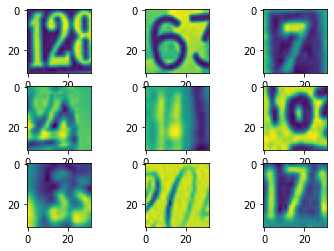

In [107]:
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(xtrain[i].reshape(32,32))
plt.show()

In [108]:
print(xtrain.shape)
type(xtrain)

(42000, 32, 32, 1)


numpy.ndarray

**Reshape and flatten the dataset.**

In [109]:
train_features = xtrain.reshape(42000, 1024)
print(train_features.shape)
test_features = xtest.reshape(18000, 1024)
print(test_features.shape)
val_features = xval.reshape(60000, 1024)
print(val_features.shape)

(42000, 1024)
(18000, 1024)
(60000, 1024)


**One Hot Encode the Label Data.**

In [110]:
y_train = np_utils.to_categorical(ytrain)
y_test = np_utils.to_categorical(ytest)
y_val = np_utils.to_categorical(yval)

**Normalize the Data.**

In [111]:
train_features /= 255.0
test_features /= 255.0
val_features /= 255.0

**Run the Neural Network model with the augmentation.**

In [112]:
# Learning rate = 0.01 with 60 epochs.

aug_model_Dense = NN_model_Dense(0.01)
aug_model_history = aug_model_Dense.fit(train_features, y_train, epochs = 60, verbose = 1)

Epoch 1/60


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


1313/1313 [==============================] - 4s 3ms/step - loss: 2.2573 - accuracy: 0.1689
Epoch 2/60
1313/1313 [==============================] - 4s 3ms/step - loss: 1.9638 - accuracy: 0.3184
Epoch 3/60
1313/1313 [==============================] - 4s 3ms/step - loss: 1.5938 - accuracy: 0.4719
Epoch 4/60
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3654 - accuracy: 0.5580
Epoch 5/60
1313/1313 [==============================] - 4s 3ms/step - loss: 1.2423 - accuracy: 0.6054
Epoch 6/60
1313/1313 [==============================] - 4s 3ms/step - loss: 1.1597 - accuracy: 0.6360
Epoch 7/60
1313/1313 [==============================] - 4s 3ms/step - loss: 1.0905 - accuracy: 0.6633
Epoch 8/60
1313/1313 [==============================] - 4s 3ms/step - loss: 1.0306 - accuracy: 0.6829
Epoch 9/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.9829 - accuracy: 0.6987
Epoch 10/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.9435 - accurac

In [113]:
# Learning rate = 0.1 with 60 epochs.

aug_model_Dense = NN_model_Dense(0.1)
aug_model_history = aug_model_Dense.fit(train_features, y_train, epochs = 60, verbose = 1)

Epoch 1/60


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


1313/1313 [==============================] - 4s 3ms/step - loss: 2.1000 - accuracy: 0.2276
Epoch 2/60
1313/1313 [==============================] - 4s 3ms/step - loss: 1.6049 - accuracy: 0.4473
Epoch 3/60
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3780 - accuracy: 0.5458
Epoch 4/60
1313/1313 [==============================] - 4s 3ms/step - loss: 1.2226 - accuracy: 0.6044
Epoch 5/60
1313/1313 [==============================] - 4s 3ms/step - loss: 1.1173 - accuracy: 0.6440
Epoch 6/60
1313/1313 [==============================] - 4s 3ms/step - loss: 1.0450 - accuracy: 0.6690
Epoch 7/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.9902 - accuracy: 0.6864
Epoch 8/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.9551 - accuracy: 0.6966
Epoch 9/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.9193 - accuracy: 0.7117
Epoch 10/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.8880 - accurac

In [114]:
# Learning rate = 0.05 with 60 epochs.

aug_model_Dense = NN_model_Dense(0.05)
aug_model_history = aug_model_Dense.fit(train_features, y_train, epochs = 60, verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/60
1313/1313 [==============================] - 5s 3ms/step - loss: 2.0725 - accuracy: 0.2502
Epoch 2/60
1313/1313 [==============================] - 4s 3ms/step - loss: 1.5426 - accuracy: 0.4734
Epoch 3/60
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3108 - accuracy: 0.5705
Epoch 4/60
1313/1313 [==============================] - 4s 3ms/step - loss: 1.1738 - accuracy: 0.6240
Epoch 5/60
1313/1313 [==============================] - 4s 3ms/step - loss: 1.0949 - accuracy: 0.6525
Epoch 6/60
1313/1313 [==============================] - 4s 3ms/step - loss: 1.0269 - accuracy: 0.6737
Epoch 7/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.9743 - accuracy: 0.6935
Epoch 8/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.9329 - accuracy: 0.7034
Epoch 9/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.8924 - accuracy: 0.7172
Epoch 10/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.864

In [115]:
Augument_Result = aug_model_Dense.evaluate(test_features,y_test)
print(result_dropout)

563/563 [==============================] - 1s 2ms/step - loss: 0.8260 - accuracy: 0.7619
[0.6214193105697632, 0.8223888874053955]


**Observations:**

Implementing data augmentation did not improve the Accuracy nor the Loss at different learning rates.

## **Insights**

In this kernel, we have trained a Feed forward Neural Network to recognize the digits in the Street View House Numbers dataset. In particular, we have performed some minimal preprocessing of the data, we have tweaked a few hyperparameters and finally, we have trained the final NN and evaluated it on the test images data. 

<BR>

Furthermore, we have provided useful visualizations (confusion matrix et al.) so as get a sense of how our model actually works and not view it as just a black-box process. 

<BR>

Finally, it should be noted that there is quite a bit of room for tuning and different architectures so as to improve the accuracy of the model; nonetheless, our results are pretty good given the simplicity of our approach.

<BR>

The steps followed at a high level were:

<BR>

A) Began the model building by implementing K Nearest Neighbor (KNN) on a reduced size dataset due to computational resource limitations.

<BR>

B) Applied Gaussian Blurring filter to assist in clearing up some of the noisy blurring in many of the images.

<BR>

C) KNN delivered an unsatisfactory accuracy and loss.

<BR>

D) Implemented a Feed Forward Neural Network with the following variations: 

<BR>

   * Relu Activation function with a learning rate of 0.05 and 50 epochs returned with an accuracy of 0.8485 and a loss of 0.4809.

<BR>

   * Batch Normalization (with Relu activation) with the test data set, batch size 300 and 50 epochs returned an impressive accuracy of 0.9564 and a low loss of 0.0970.

<BR>

   * Dropouts returned an accuracy of 0.8391 and a loss of 0.5674.

<BR>

   * "He" Initializer with Sigmoid function, a learning rate of 0.05, batch size 300 and 50 epochs returned a very low accuracy of 0.1009 and a high loss of 2.3028. Poor performance and no improvement over batch normalization and dropouts results.


<BR>

 * "He" Initializer with Relu function, a learning rate of 0.05, batch size 300 and 50 epochs returned a low accuracy of 0.7898 and a high loss of 0.6683. No improvement over batch normalization and dropouts results.


<BR>

   * Data Augmentation with a learning rate of 0.05 and 50 epochs returned with an accuracy of 0.8165 and a loss of 0.5808. Data augmentation dod not improve on the earlier results.

<BR>



### **Conclusion**

<br>

Artificial Neural Networks (ANNs) do not always work  well with image data, because ANNs do not take 2-D images as input. They flatten the image and make it lose its spatial struture, whereas Convoluted Neural Networks (CNNs) take the full 2D-image as input in order to perform feature extraction. So CNNs do not lose the image's spatial structure, which makes them more suitable for working with image datasets.

<br>

There is still scope for improvement in the test accuracy and loss of the ANN model chosen here. CNNs with different architectures can be built and hyperparamter tuning can be performed to obtain a an even more accurate image classifier approaching the 99th percentile.

<br>

Batch Normalization delivered the highest accuracy and best loss results compared to all the other hyperparameter tuning methods in this ANN; this is a model that can identify house numbers on blurry images presented to it albeit with a small margin of error.

<br>

Running the same model on the entire larger data set should produce greater accuracy and smaller loss results on a more powerful server or computer without the current resource constraints. 
